# Chapter: Fault Detection & Diagnosis via Unsupervised Artificial Neural Networks Modeling


# Topic: Fault detection using Autoencoder

In [1]:
# import required packages
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow
tensorflow.random.set_seed(2)

plt.rcParams.update({'font.size': 14})
np.random.seed(1)

In [2]:
# read data
X_train = pd.read_csv('NOC_varyingFeedFlow_outputs.csv', header=None).values
X_train = X_train[:,1:] # first column contains timestamps

In [3]:
# split data into fitting and validation datasets
from sklearn.model_selection import train_test_split
X_fit, X_val, _, _ = train_test_split(X_train, X_train, test_size=0.2, random_state=10)

In [4]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_fit_scaled = scaler.fit_transform(X_fit)
X_val_scaled = scaler.transform(X_val)
X_train_scaled = scaler.transform(X_train)

In [5]:
# define and compile model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_fit_scaled.shape[1],)) # input layer
encoded = Dense(23, kernel_regularizer=regularizers.L1(0.0001), activation='relu', kernel_initializer='he_normal')(input_layer) # encoder layer
encoded = Dense(6, kernel_regularizer=regularizers.L1(0.0001), activation='relu', kernel_initializer='he_normal')(encoded) # encoder layer
decoded = Dense(23, kernel_regularizer=regularizers.L1(0.0001), activation='relu', kernel_initializer='he_normal')(encoded) # decoder layer
decoded = Dense(X_fit_scaled.shape[1], kernel_regularizer=regularizers.L1(0.0001), activation='linear')(decoded) # decoder layer

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Print model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 23)                1081      
                                                                 
 dense_1 (Dense)             (None, 6)                 144       
                                                                 
 dense_2 (Dense)             (None, 23)                161       
                                                                 
 dense_3 (Dense)             (None, 46)                1104      
                                                                 
Total params: 2,490
Trainable params: 2,490
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10)
history = autoencoder.fit(X_fit_scaled, X_fit_scaled, epochs=300, batch_size=256,validation_data=(X_val_scaled, X_val_scaled),callbacks=es)

Epoch 1/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0789 - val_loss: 0.9037
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.7366 - val_loss: 0.5378
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.3776 - val_loss: 0.2687
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.2287 - val_loss: 0.2011
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1946 - val_loss: 0.1873
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1872 - val_loss: 0.1828
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1829 - val_loss: 0.1783
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1773 - val_loss: 0.1715
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1692 - val_loss: 0.1626
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1602 - val_loss: 0.1539
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.0483 - val_loss: 0.0480
Epoch 83/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0479 - val_loss: 0.0480
Epoch 84/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0477 - val_loss: 0.0475
Epoch 85/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0477 - val_loss: 0.0473
Epoch 86/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0473 - val_loss: 0.0471
Epoch 87/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0472 - val_loss: 0.0469
Epoch 88/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.0467
Epoch 89/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0467 - val_loss: 0.0465
Epoch 90/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0466 - val_loss: 0.0466
Epoch 91/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0465 - val_loss: 0.0464
Epoch 92/300


32/32 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.0265
Epoch 164/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.0265
Epoch 165/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.0263
Epoch 166/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.0262
Epoch 167/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.0263
Epoch 168/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.0260
Epoch 169/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.0261
Epoch 170/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0259
Epoch 171/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0259
Epoch 172/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.0258
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.0222
Epoch 245/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.0221
Epoch 246/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.0220
Epoch 247/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.0220
Epoch 248/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 249/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 250/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.0218
Epoch 251/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.0219
Epoch 252/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.0218
Epoch 253/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0217
Epoc

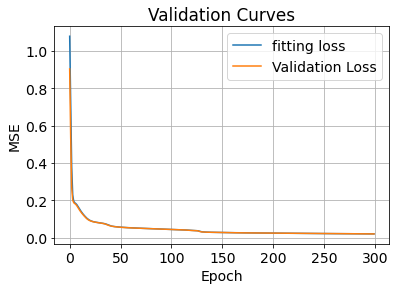

In [7]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='fitting loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

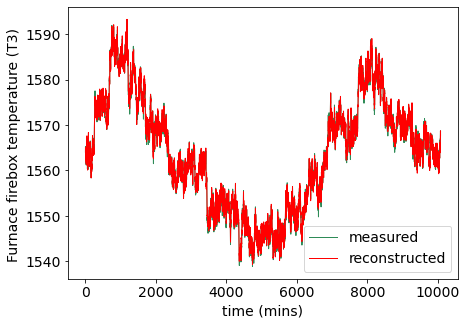

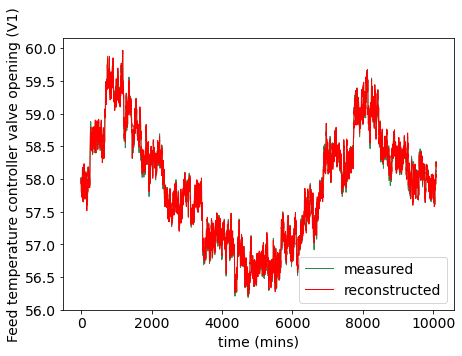

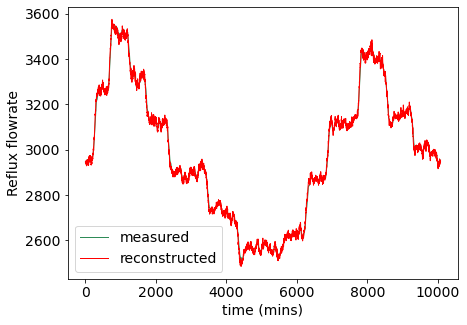

In [9]:
# predict for overall training dataset
X_train_scaled_pred = autoencoder.predict(X_train_scaled)
X_train_pred = scaler.inverse_transform(X_train_scaled_pred)

# compare via plots
plt.figure(figsize=[7,5])
var = 7
plt.plot(X_train[:,var],'seagreen', linewidth=1, label='measured')
plt.plot(X_train_pred[:,var],'red', linewidth=1, label='reconstructed')
plt.xlabel('time (mins)')
plt.ylabel('Furnace firebox temperature (T3) ')
plt.legend()

plt.figure(figsize=[7,5])
var = 21
plt.plot(X_train[:,var],'seagreen', linewidth=1, label='measured')
plt.plot(X_train_pred[:,var],'red', linewidth=1, label='reconstructed')
plt.xlabel('time (mins)')
plt.ylabel('Feed temperature controller valve opening (V1)')
plt.legend()

plt.figure(figsize=[7,5])
var = 38
plt.plot(X_train[:,var],'seagreen', linewidth=1, label='measured')
plt.plot(X_train_pred[:,var],'red', linewidth=1, label='reconstructed')
plt.xlabel('time (mins)')
plt.ylabel('Reflux flowrate')
plt.legend()

plt.show()

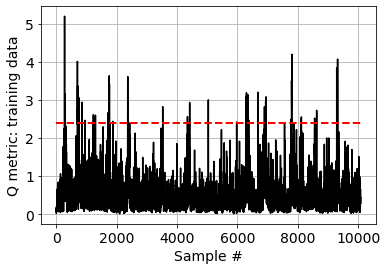

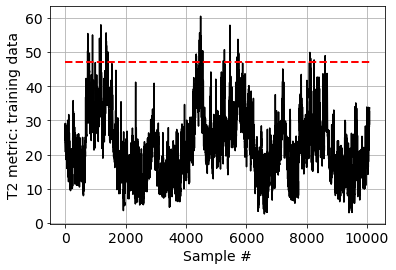

In [11]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                Monitoring statistics for training samples
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
h_train = encoder.predict(X_train_scaled)

# Q metric for training samples
error_train = X_train_scaled - X_train_scaled_pred
Q_train = np.sum(error_train*error_train, axis = 1)
Q_CL = np.percentile(Q_train, 99)

# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.grid()
plt.show()

# T2 metric for training samples
h_cov = np.cov(h_train, rowvar=False)
h_cov_inv = np.linalg.inv(h_cov)
T2_train = np.zeros((X_train.shape[0],))
for i in range(X_train.shape[0]):
    T2_train[i] = np.dot(np.dot(h_train[i,:],h_cov_inv),h_train[i,:].T)
    
T2_CL = np.percentile(T2_train, 99)

# T2_train plot with CL
plt.figure()
plt.plot(T2_train, color='black')
plt.plot([1,len(T2_train)],[T2_CL,T2_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T2 metric: training data')
plt.grid()
plt.show()

In [12]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                Heat Ex fouling test data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
X_test = pd.read_csv('UAf_decrease_outputs.csv', header=None).values
X_test = X_test[:,1:]

X_test_scaled = scaler.transform(X_test) # using scaling parameters from training data
X_test_scaled_pred = autoencoder.predict(X_test_scaled)
X_test_pred = scaler.inverse_transform(X_test_scaled_pred)

h_test = encoder.predict(X_test_scaled)

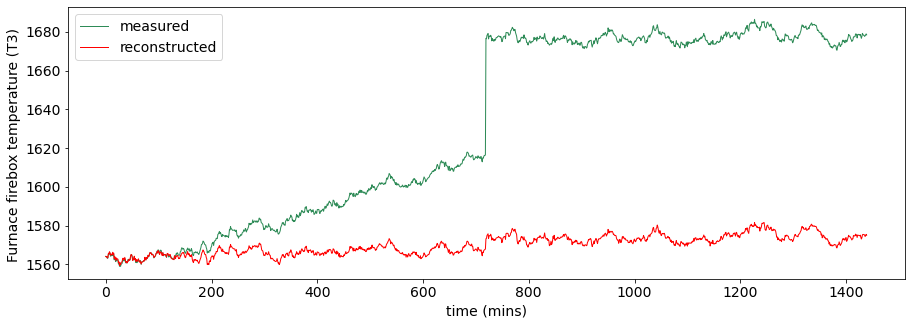

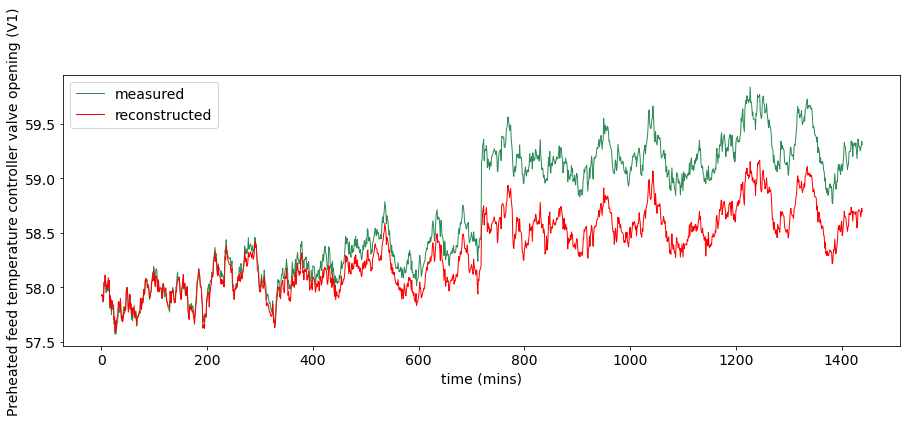

In [14]:
# compare via plots
plt.figure(figsize=[15,5])
var = 7
plt.plot(X_test[:,var],'seagreen', linewidth=1, label='measured')
plt.plot(X_test_pred[:,var],'red', linewidth=1, label='reconstructed')
plt.xlabel('time (mins)')
plt.ylabel('Furnace firebox temperature (T3) ')
plt.legend()

plt.figure(figsize=[15,5])
var = 21
plt.plot(X_test[:,var],'seagreen', linewidth=1, label='measured')
plt.plot(X_test_pred[:,var],'red', linewidth=1, label='reconstructed')
plt.xlabel('time (mins)')
plt.ylabel('Preheated feed temperature controller valve opening (V1)')
plt.legend()

plt.show()

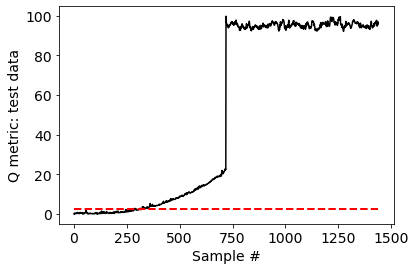

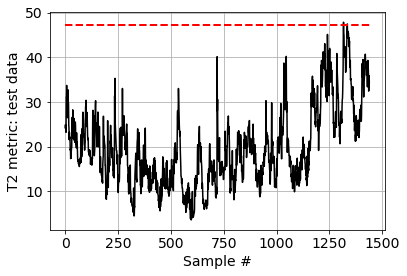

In [15]:
#%% Q metric for test samples
error_test = X_test_scaled - X_test_scaled_pred
Q_test = np.sum(error_test*error_test, axis = 1)

# Q_test plot with CL
plt.figure()
plt.plot(Q_test, color='black')
plt.plot([1,len(Q_test)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: test data')

# T2 metric for test samples
T2_test = np.zeros((X_test.shape[0],))
for i in range(X_test.shape[0]):
    T2_test[i] = np.dot(np.dot(h_test[i,:],h_cov_inv),h_test[i,:].T)

# T2_test plot with CL
plt.figure()
plt.plot(T2_test, color='black')
plt.plot([1,len(h_test)],[T2_CL,T2_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T2 metric: test data')
plt.grid()
plt.show()

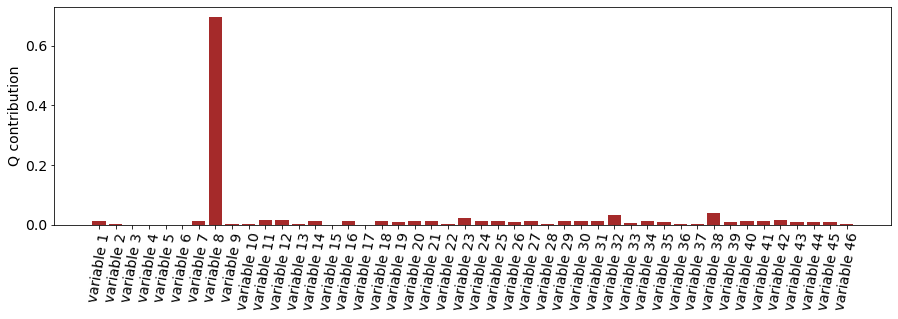

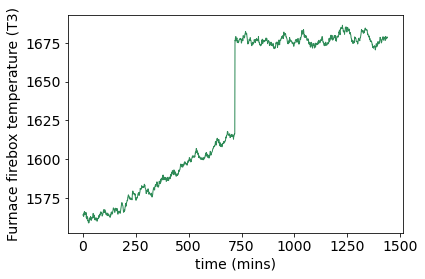

In [16]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                Fault diagnosis
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%% Q contribution
sample = 250
error_test_sample = error_test[sample-1,]
Q_contri = error_test_sample*error_test_sample # vector of contributions

plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri, color='brown')
plt.xticks(rotation = 80)
plt.ylabel('Q contribution')

# plot top diagnosed variables
plt.figure(figsize=[6,4])
plt.plot(X_test[:,7],'seagreen', linewidth=1)
plt.xlabel('time (mins)')
plt.ylabel('Furnace firebox temperature (T3)')

plt.show()